In [348]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

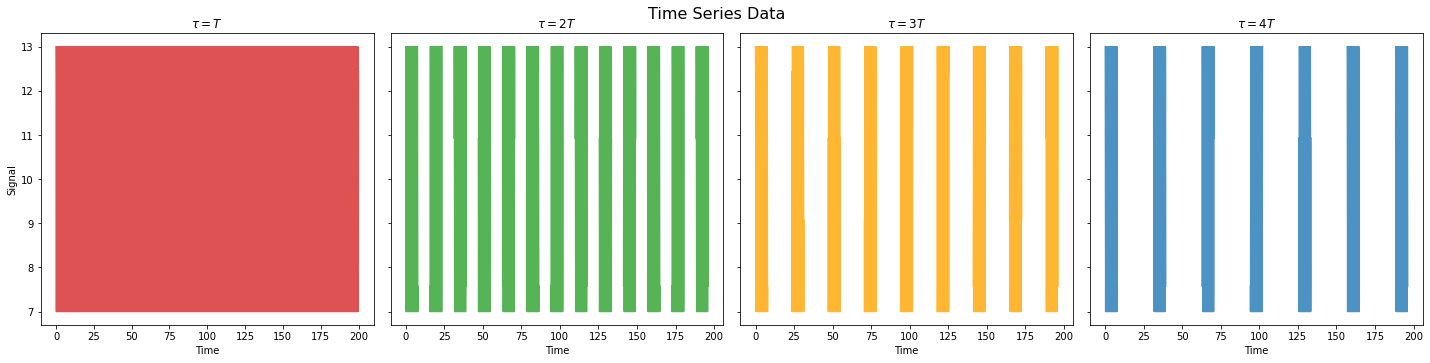

In [349]:
gapped_path = '/Users/calebburke/Downloads/PyFT/mockdata_gaps.csv'
df = pd.read_csv(gapped_path)

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Plot each pair of 'time' and 'signal' in its corresponding subplot
titles = ['$\\tau = T$', '$\\tau = 2T$', '$\\tau = 3T$', '$\\tau = 4T$']
color = ['#d62728', '#2ca02c', 'orange', '#1f77b4']
for i in range(4):
    time_key = f"time_{i+1}"
    signal_key = f"signal_{i+1}"
    axs[i].plot(df[time_key], df[signal_key], color=color[i], alpha=0.8)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel("Time")
    if i == 0:
        axs[i].set_ylabel("Signal")

plt.tight_layout()
fig.suptitle('Time Series Data', fontsize=16, y=1)
plt.savefig(f"/Users/calebburke/Downloads/PyFT/plots/GappedDataPlots.png", bbox_inches='tight')
plt.show()

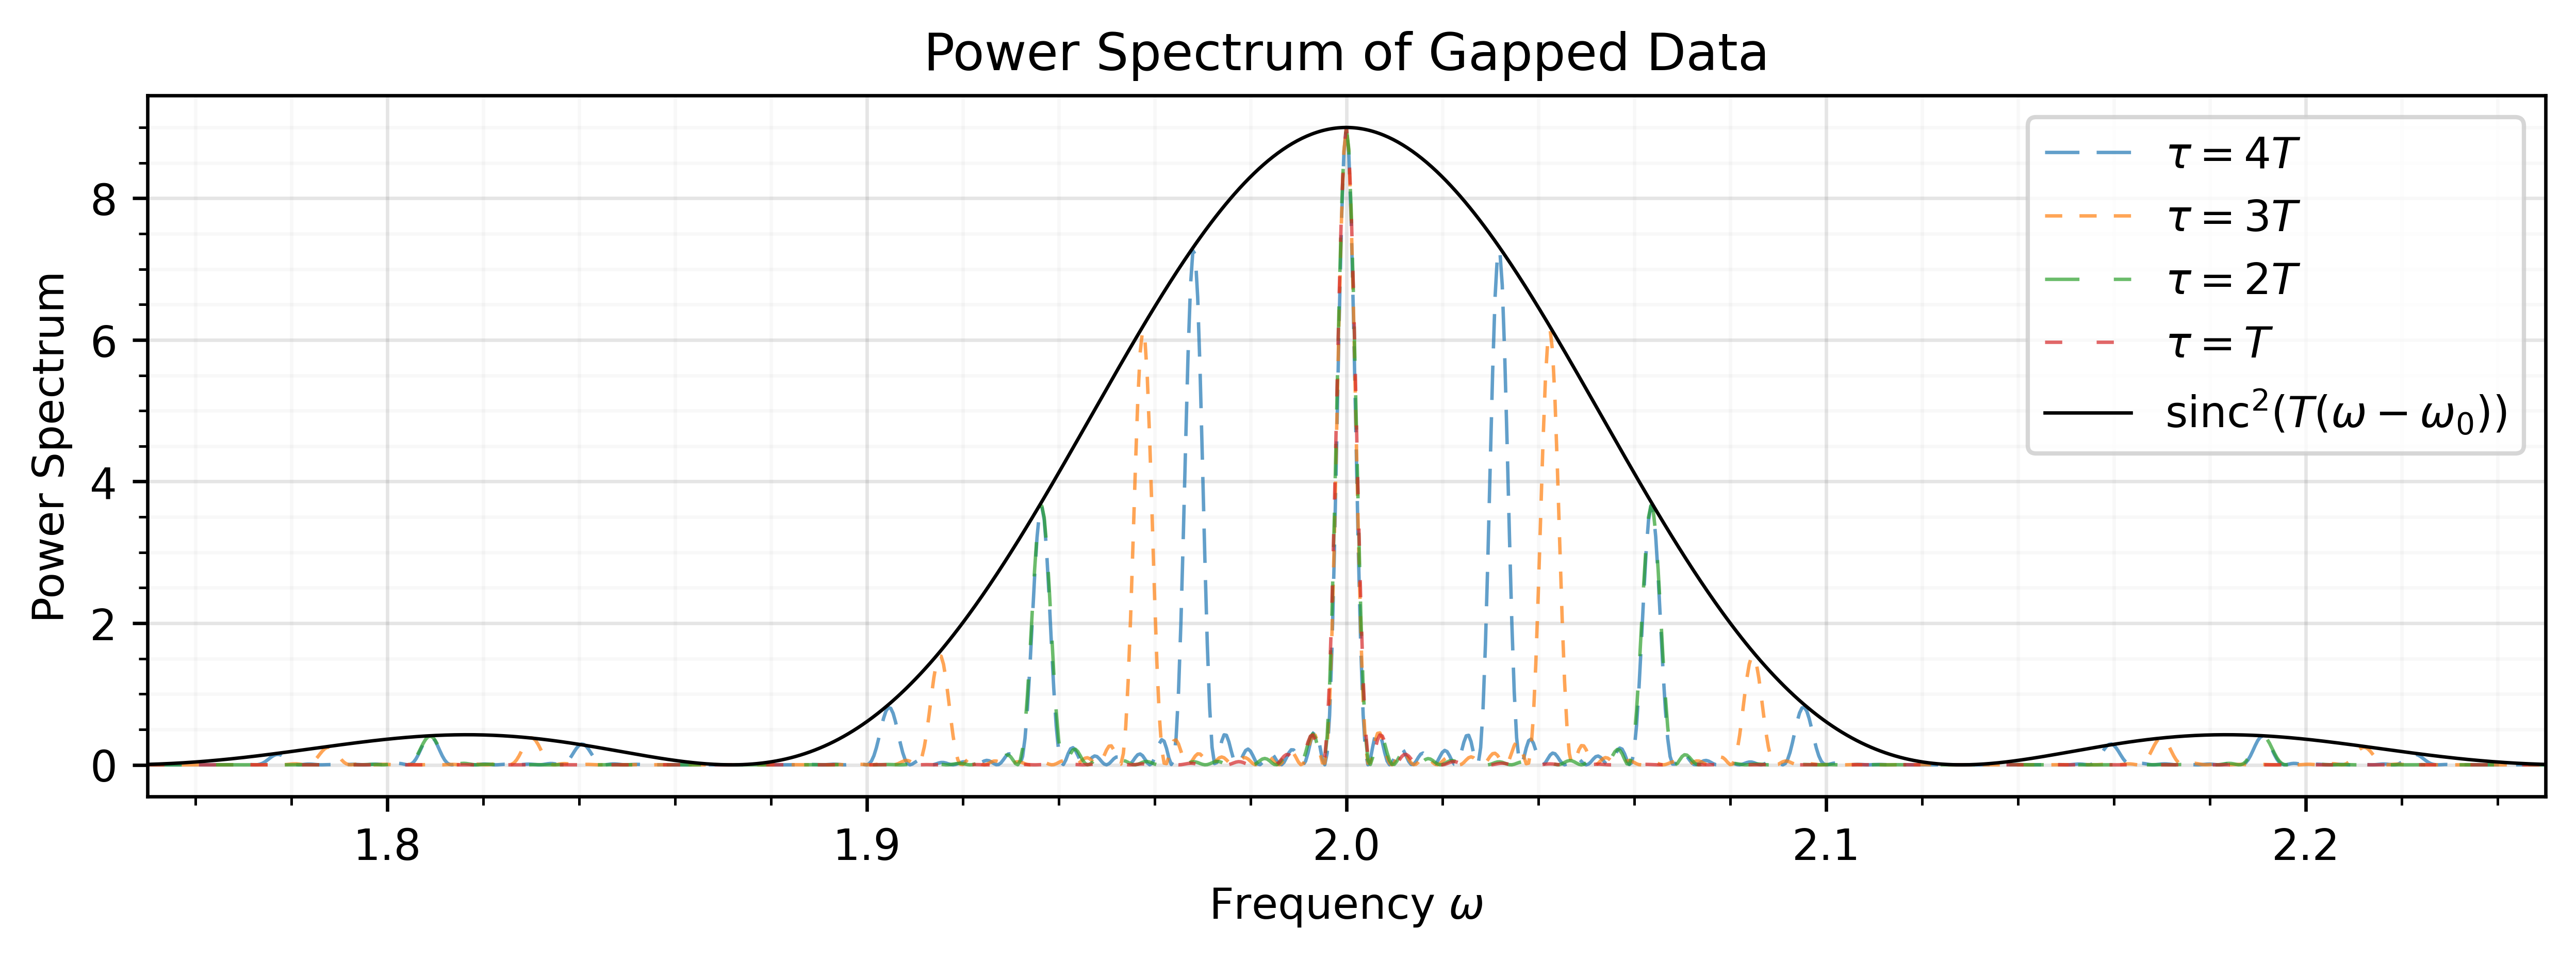

In [311]:
# Path to the NetCDF file
file_path_4 = "/Users/calebburke/Downloads/PyFT/PS_Data/4_mockdata_gaps_PS.nc"
file_path_3 = "/Users/calebburke/Downloads/PyFT/PS_Data/3_mockdata_gaps_PS.nc"
file_path_2 = "/Users/calebburke/Downloads/PyFT/PS_Data/2_mockdata_gaps_PS.nc"
file_path_1 = "/Users/calebburke/Downloads/PyFT/PS_Data/1_mockdata_gaps_PS.nc"

# Open the NetCDF file
ds_1 = xr.open_dataset(file_path_1)
ds_2 = xr.open_dataset(file_path_2)
ds_3 = xr.open_dataset(file_path_3)
ds_4 = xr.open_dataset(file_path_4)

plt.figure(figsize=(10, 3), dpi=600)
ds_4['P'].plot(label='$\\tau = 4T$', alpha=0.7, linewidth=0.8, linestyle='--', dashes=(10, 5))
ds_3['P'].plot(label='$\\tau = 3T$', alpha=0.7, linewidth=0.8, linestyle='--', dashes=(5, 5))
ds_2['P'].plot(label='$\\tau = 2T$', alpha=0.7, linewidth=0.8, linestyle='--', dashes=(10, 10))
ds_1['P'].plot(label='$\\tau = T$', alpha=0.7, linewidth=0.8, linestyle='--', dashes=(5, 10))

f = np.linspace(1.75, 2.25, 1000)
A = 9
w = 7.8
plt.plot(f, A*np.sinc(w*(f-2))**2, label = r'$\mathrm{sinc}^{2}(T(\omega - \omega_{0}))$', color='black', linewidth=0.8)

plt.xlabel(r'Frequency $\omega$')
plt.ylabel('Power Spectrum')
plt.title('Power Spectrum of Gapped Data')
plt.legend()
plt.xlim(1.75, 2.25)
plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.2)
plt.grid(b=True, which='minor', color='grey', linestyle='-', alpha=0.05)
plt.minorticks_on()
plt.savefig(f"/Users/calebburke/Downloads/PyFT/plots/GappedDataSuperimposed.png", bbox_inches='tight')
plt.show()

In [361]:
import xarray as xr
import numpy as np
from scipy.signal import find_peaks

P2 = ds_2['P'].values
P3 = ds_3['P'].values
P4 = ds_4['P'].values

# Find the indices of the local maxima
peaks2, _ = find_peaks(P2)
peaks3, _ = find_peaks(P3)
peaks4, _ = find_peaks(P4)

# Filter peaks to retain only those larger than 0.5
filtered_peaks2 = [peak for peak in peaks2 if P2[peak] > 0.5]
filtered_peaks3 = [peak for peak in peaks3 if P3[peak] > 0.5]
filtered_peaks4 = [peak for peak in peaks4 if P4[peak] > 0.5]

# Selecting the corresponding frequency values
freq_filtered_peaks2 = ds_2['freq'].isel(freq=filtered_peaks2).values
freq_filtered_peaks3 = ds_3['freq'].isel(freq=filtered_peaks3).values
freq_filtered_peaks4 = ds_4['freq'].isel(freq=filtered_peaks4).values

# Display the frequency values at the filtered peaks
print('Differences between side-bands are:')
print(f'τ = 2T: {np.diff(freq_filtered_peaks2)}')
print(f'τ = 3T: {np.diff(freq_filtered_peaks3)}')
print(f'τ = 4T: {np.diff(freq_filtered_peaks4).mean()}')


Differences between side-bands are:
τ = 2T: [0.0635 0.0635]
τ = 3T: [0.0425 0.0425 0.0425 0.0425]
τ = 4T: 0.03183333333332986


In [299]:
import xarray as xr
import numpy as np
from scipy.signal import find_peaks

P2 = ds_2['P'].values
P3 = ds_3['P'].values
P4 = ds_4['P'].values

# Find the indices of the local maxima
peaks2, _ = find_peaks(P2)
peaks3, _ = find_peaks(P3)
peaks4, _ = find_peaks(P4)

# Filter peaks to retain only those larger than 0.5
filtered_peaks2 = [peak for peak in peaks2]
filtered_peaks3 = [peak for peak in peaks3]
filtered_peaks4 = [peak for peak in peaks4]

# Selecting the corresponding frequency values
freq_filtered_peaks2 = ds_2['freq'].isel(freq=filtered_peaks2).values
freq_filtered_peaks3 = ds_3['freq'].isel(freq=filtered_peaks3).values
freq_filtered_peaks4 = ds_4['freq'].isel(freq=filtered_peaks4).values

# Display the frequency values at the filtered peaks
print('Mean difference in sinc() peaks:')
print(f'τ = 2T: {np.diff(freq_filtered_peaks2).mean()}')
print(f'τ = 3T: {np.diff(freq_filtered_peaks3).mean()}')
print(f'τ = 4T: {np.diff(freq_filtered_peaks4).mean()}')

Mean difference in sinc() peaks:
τ = 2T: 0.005226315789473109
τ = 3T: 0.005179687499999429
τ = 4T: 0.005228947368420477


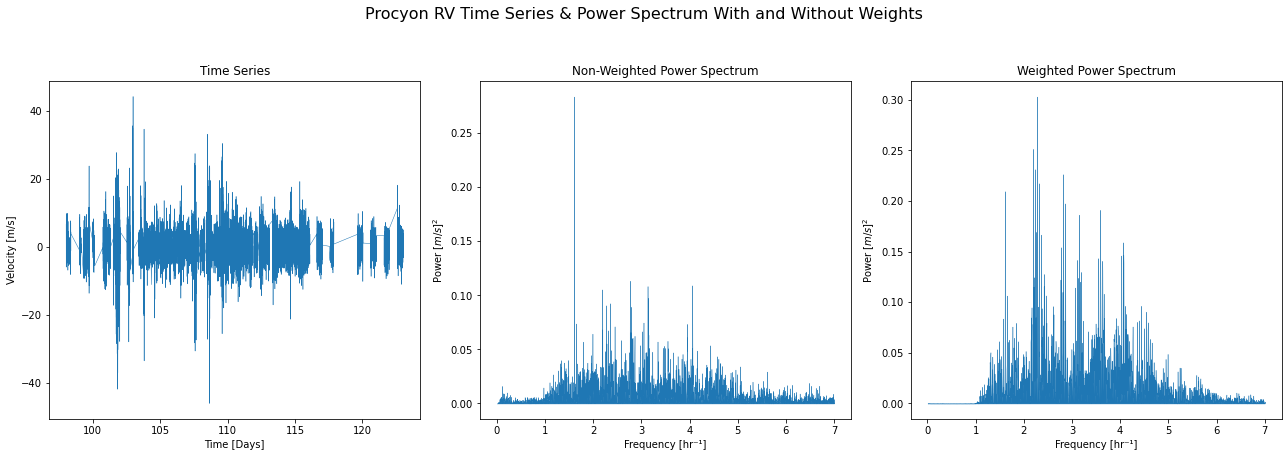

In [300]:
import xarray as xr
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Define the path to your dataset
file_path_nw = '/Users/calebburke/Downloads/PyFT/PS_Data/NOWEIGHTS-Procyon-Multisite-SolarLike_PS.nc'
file_path_w = '/Users/calebburke/Downloads/PyFT/PS_Data/WEIGHTS-Procyon-Multisite-SolarLike_PS.nc'
file_path_t = '/Users/calebburke/Downloads/PyFT/Procyon-Multisite-SolarLike.csv'

# Open the dataset using xarray
ds_nw = xr.open_dataset(file_path_nw)
ds_w = xr.open_dataset(file_path_w)
df = pd.read_csv(file_path_t)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot each dataset
axs[0].plot(df['TimeInDays'], df['VelocityInMetrePerSecond'], linewidth=0.5)
axs[0].set_title('Time Series')
axs[0].set_xlabel('Time [Days]')
axs[0].set_ylabel('Velocity [m/s]')

#axs[1].plot(ds_nw['freq'], ds_nw['P'], linewidth=0.5)
axs[1].fill_between(ds_nw['freq'], ds_nw['P'], color='#1f77b4', alpha=1, linewidth=0.4)
axs[1].set_title('Non-Weighted Power Spectrum')
axs[1].set_xlabel('Frequency [hr⁻¹]')  # Update with actual label
axs[1].set_ylabel('Power $[m/s]^{2}$')  # Update with actual label

#axs[2].plot(ds_w['freq'], ds_w['P'], linewidth=0.5)
axs[2].fill_between(ds_w['freq'], ds_w['P'], color='#1f77b4', alpha=1, linewidth=0.4)
axs[2].set_title('Weighted Power Spectrum')
axs[2].set_xlabel('Frequency [hr⁻¹]')  # Update with actual label
axs[2].set_ylabel('Power $[m/s]^{2}$')  # Update with actual label

fig.suptitle('Procyon RV Time Series & Power Spectrum With and Without Weights', fontsize=16, y=1.05)
plt.tight_layout()


plt.savefig(f"/Users/calebburke/Downloads/PyFT/plots/ProcyonData.png")
plt.show()

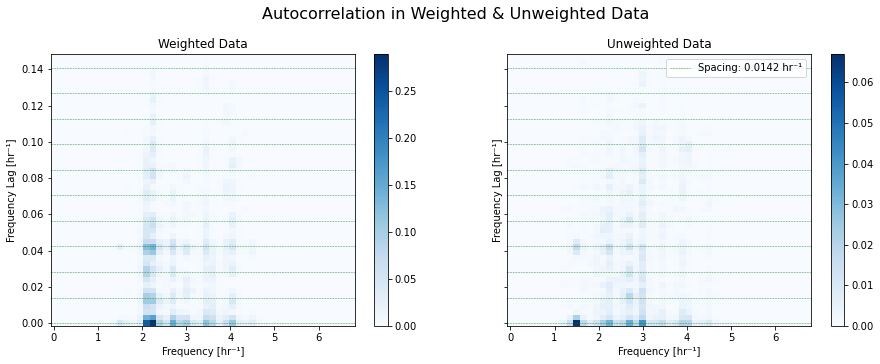

In [346]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Calculate autocorrelation function
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

# Define the paths to your datasets
file_path_w = '/Users/calebburke/Downloads/PyFT/PS_Data/WEIGHTS-Procyon-Multisite-SolarLike_PS.nc'
file_path_nw = '/Users/calebburke/Downloads/PyFT/PS_Data/NOWEIGHTS-Procyon-Multisite-SolarLike_PS.nc'

# Load datasets
ds_w = xr.open_dataset(file_path_w)
ds_nw = xr.open_dataset(file_path_nw)
ds_w['P'] = xr.where(ds_w['P'] > 0.06, ds_w['P'], 0)
ds_nw['P'] = xr.where(ds_nw['P'] > 0.025, ds_nw['P'], 0)

datasets = [ds_w['P'], ds_nw['P']]
titles = ['Weighted Data', 'Unweighted Data']
chunsize = 50
df = 0.003

# Create a figure and axis
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

for j, ax in enumerate(axs):
    autocorrs = []

    # Calculate autocorrelations
    for i in range(0, len(datasets[j]) // chunsize + 1):
        data_slice = datasets[j].isel(freq=slice(i * chunsize, (i + 1) * chunsize)).values
        data_slice = np.nan_to_num(data_slice, nan=0.0)
        autocorr_values = autocorr(data_slice)
        autocorrs.append(autocorr_values)

    # Remove the last element to match dimensions
    autocorrs = autocorrs[:-1]

    # Apply Gaussian filter to smooth the data
    sigma = 0.5
    smoothed_autocorrs = gaussian_filter(autocorrs, sigma=sigma)

    # Create xarray DataArray from the smoothed data
    da = xr.DataArray(smoothed_autocorrs, dims=('Frequency', 'Lag'))
    da['Frequency'] = np.arange(len(smoothed_autocorrs)) * df * chunsize
    da['Lag'] = np.arange(len(smoothed_autocorrs[0])) * df
    
    # Add units attribute
    da['Frequency'].attrs['units'] = 'hr⁻¹'
    
    # Add horizontal lines at multiples of 0.0144
    for n in range(0, 11):
        if n == 0:
            ax.axhline(y=n*0.0141, color='green', linestyle='--', linewidth=0.5, alpha=0.8, label='Spacing: 0.0142 hr⁻¹')
        else:
            ax.axhline(y=n*0.0141, color='green', linestyle='--', linewidth=0.5, alpha=0.8)


    # Plot the smoothed data on the respective axis
    da.transpose().plot(ax=ax, cmap='Blues')
    ax.set_title(titles[j])
    ax.set_ylabel('Frequency Lag [hr⁻¹]')

# Adjust layout for better spacing
#plt.tight_layout()

fig.suptitle('Autocorrelation in Weighted & Unweighted Data', fontsize=16, y=1.01)
plt.legend(loc='upper right')
plt.savefig(f"/Users/calebburke/Downloads/PyFT/plots/AutocorProcyon.png", bbox_inches='tight')
plt.show()
